In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
## Import IRIS dataset
iris = datasets.load_iris()

In [3]:
iris_data = pd.DataFrame(iris.data)

In [4]:
iris_data.columns = iris.feature_names

In [5]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
## Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [7]:
X_scaled = scaler.fit_transform(iris_data)

In [8]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [9]:
## Apply the PCA
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)

In [11]:
pca_scaled = pca.fit_transform(X_scaled)

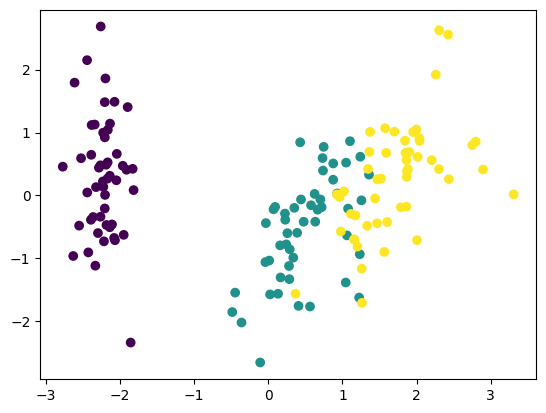

In [12]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=iris.target)

Text(0, 0.5, 'Eucledian Distance')

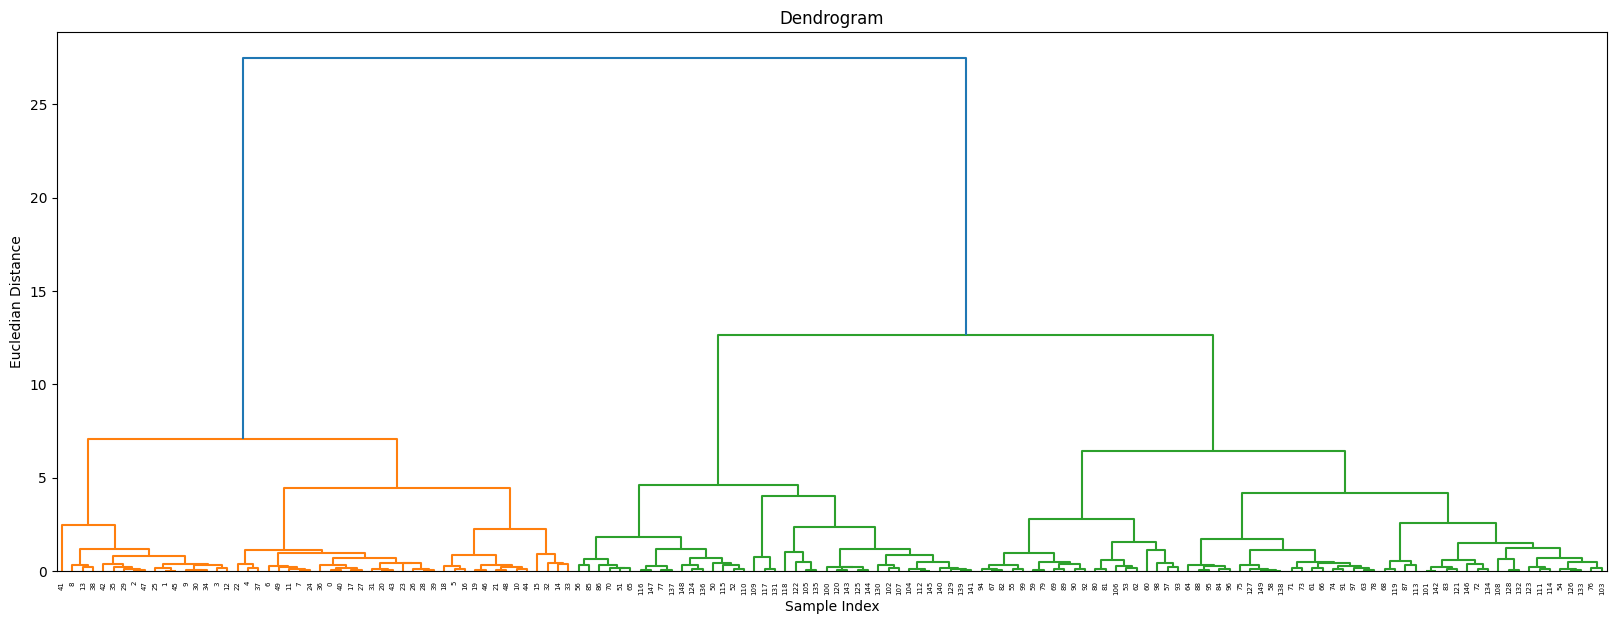

In [13]:
## Agglomerative Clustering
## To construct a dendogram
import scipy.cluster.hierarchy as sc

## Plot the dendogram
plt.figure(figsize=(20, 7))

## Create dendogram
sc.dendrogram(sc.linkage(pca_scaled, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Eucledian Distance")

In [14]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, linkage="ward")
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [15]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

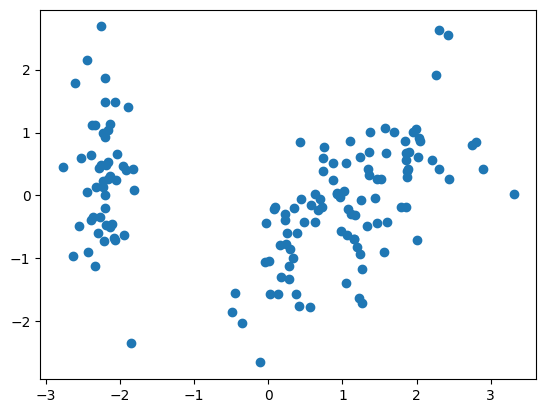

In [16]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1])

In [17]:
## silhouette score
from sklearn.metrics import silhouette_score

k=2, silhouette score=0.577
k=3, silhouette score=0.447
k=4, silhouette score=0.401
k=5, silhouette score=0.331
k=6, silhouette score=0.315
k=7, silhouette score=0.317
k=8, silhouette score=0.311
k=9, silhouette score=0.311
k=10, silhouette score=0.316


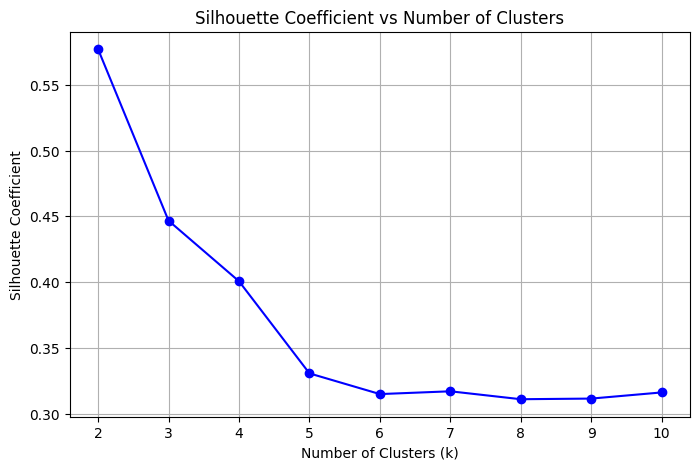

In [18]:
silhouette_scores = []

# Compute silhouette scores for k = 2 to 10
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k, linkage="ward")
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled, agglo.labels_)
    silhouette_scores.append(score)
    print(f"k={k}, silhouette score={score:.3f}")

# Plotting the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker="o", linestyle="-", color="blue")
plt.title("Silhouette Coefficient vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Coefficient")
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()